In [1]:
import re
import collections
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import japanize_matplotlib
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 1000000000)
pd.set_option('display.max_rows', 1000000000)

In [2]:
path = "LBC定義書_20170206.xls"
df = pd.read_excel(path)
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,LBC定義書
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
path = "LBC納品項目_180329-1.xls"
dfcc = pd.read_excel(path)
dfcc.style.set_properties(subset="補足", **{'width-min': '300px'})

,区分,種類,NO.,項目名（日本語）,項目名（英語）,Type,Byte,表示方法,備考,サンプルデータ,Unnamed: 10,詳細,補足
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,基本ＬＢＣ,1.000000,1.000000,LBC,OFFICE_ID,Character,11,半角/11桁コード,LBC体系については、別紙参照。,10007645542,00003291641,保有する全ての事業所データについてユニークに割り当てられるコード。（OFFICE_ID） コード自体に企業を分別する情報は保有していない。 例：初めの4桁が会社を意味する等。,LBCでは下記のような施設については施設を本社データとして作成し、設置・運営団体を系列で紐付けている。 例えば 自治体の運営する施設と自治体、福祉施設と社会福祉法人などの団体、 学校施設と学校法人などの団体、病院施設と医療法人などの団体になる。 （LBC体系詳細については、別紙参照） 新規発番時、その拠点が本社であるか事業所であるか不明の場合 本社LBCが空白で作成される場合がある。
2,nan,1.000000,2.000000,本社LBC,HEAD_OFFICE_ID,Character,11,nan,LBC体系については、別紙参照。,10007645542,00003291641,当該データの本社データの「OFFICE_ID」を格納。,nan
3,nan,1.000000,3.000000,親会社LBC,TOP_HEAD_OFFICE_ID,Character,11,nan,LBC体系については、別紙参照。,nan,00003291641,当該データの親会社の「OFFICE_ID」を格納。親会社とは「出資比率が50％超」の会社。,nan
4,nan,1.000000,4.000000,系列トップLBC1,TOP_AFFILIATED_OFFICE_ID1,Character,11,nan,LBC体系については、別紙参照。,00171449764,00003291641,当該データの本社データに格納されている系列上で最上位にある会社の「OFFICE_ID」を格納。 当該データの系列が複数存在する（系列に分岐がある）場合、 「TOP_AFFILIATED_OFFICE_ID（1～10）」の格納順位は、 「AFFILIATED_OFFICE_ID(1～10)」に格納されている順位（1～10）で決定され、それらのデータが持つ系列を遡った最上位を格納。,nan
5,nan,nan,5.000000,系列トップLBC2,TOP_AFFILIATED_OFFICE_ID2,Character,11,nan,LBC体系については、別紙参照。,nan,nan,nan,nan
6,nan,nan,6.000000,系列トップLBC3,TOP_AFFILIATED_OFFICE_ID3,Character,11,nan,LBC体系については、別紙参照。,nan,nan,nan,nan
7,nan,nan,7.000000,系列トップLBC4,TOP_AFFILIATED_OFFICE_ID4,Character,11,nan,LBC体系については、別紙参照。,nan,nan,nan,nan
8,nan,nan,8.000000,系列トップLBC5,TOP_AFFILIATED_OFFICE_ID5,Character,11,nan,LBC体系については、別紙参照。,nan,nan,nan,nan
9,nan,nan,9.000000,系列トップLBC6,TOP_AFFILIATED_OFFICE_ID6,Character,11,nan,LBC体系については、別紙参照。,nan,nan,nan,nan


In [4]:
path = "LBC_202011_mini.csv"
dfc = pd.read_csv(path, encoding="cp932")
dfc.head()#役員名_役職名

,LBC,本社LBC,親会社LBC,系列トップLBC1,系列トップLBC2,系列トップLBC3,系列トップLBC4,系列トップLBC5,系列トップLBC6,系列トップLBC7,系列トップLBC8,系列トップLBC9,系列トップLBC10,系列LBC1,系列LBC2,系列LBC3,系列LBC4,系列LBC5,系列LBC6,系列LBC7,系列LBC8,系列LBC9,系列LBC10,系列属性フラグ1,系列属性フラグ2,系列属性フラグ3,系列属性フラグ4,系列属性フラグ5,系列属性フラグ6,系列属性フラグ7,系列属性フラグ8,系列属性フラグ9,系列属性フラグ10,系列属性名称1,系列属性名称2,系列属性名称3,系列属性名称4,系列属性名称5,系列属性名称6,系列属性名称7,系列属性名称8,系列属性名称9,系列属性名称10,上場区分フラグ,上場区分名称,証券コード,有価証券報告書ナンバー,会社状況フラグ,会社状況名称,事業所状況フラグ,事業所状況名称,合併先ＬＢＣ,倒産年月,企業活力,グレード,法人格コード,法人格名称,社名,社名カナ,事業所,郵便番号,県コード,市区町村コード,都道府県名,市区郡町村名,町大字通称名,字丁目,番地番号,建物名部屋番号,電話番号,FAX番号,事業所数,設立年_月,資本金,従業員数,当期決算年月,当期売上高,当期売上高前年比率,当期利益,当期利益前年比率,当期配当金,前期決算年月,前期売上高,前期売上高前年比率,前期利益,前期利益前年比率,前期配当金,前々期決算年月,前々期売上高,前々期売上高前年比率,前々期利益,前々期利益前年比率,前々期配当金,代表者役職,代表者名,代表者カナ,役員名_役職名,主要株主_持株数_持株比率,業種コード1,業種名称1,業種コード2,業種名称2,業種コード3,業種名称3,各種認定資格,各種加盟団体,URL,電話番号コールチェックフラグ,電話番号コールチェック年月日,移転先電話番号,FAX番号コールチェックフラグ,FAX番号コールチェック年月日,移転先FAX番号,企業区分フラグ,企業区分名称,外資系フラグ,マッチングフラグ,調査日,従業員数コード,売上高コード,当期利益コード,従業員数詳細レンジ,売上高詳細レンジ,利益詳細レンジ,回線種別,法人番号,資本金詳細レンジ
0,135,135,135.0,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,非上場,NaN,NaN,0,非倒産,0,非閉鎖,NaN,NaN,A+,4.0,1,株式会社,株式会社ホッカン,ﾎﾂｶﾝ,NaN,30030,1,1104,北海道,札幌市白石区,流通センター,７丁目,８,NaN,118941122,118921825.0,9.0,197307.0,40000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,代表取締役社長,青田 孝志,NaN,NaN,NaN,922,海藻加工業,5223.0,乾物卸売業,5226.0,茶類卸売業,NaN,NaN,http://www.hokkan.co.jp,1,20060622,NaN,1.0,20060922.0,NaN,1,一般企業,NaN,0,20191222,5,7,99,5,7,99,NaN,1.430001e+12,6
1,340,340,340.0,340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,非上場,NaN,NaN,0,非倒産,0,非閉鎖,NaN,NaN,B+,8.0,1,株式会社,旭イノベックス株式会社,ｱｻﾋｲﾉﾍﾞﾂｸｽ,NaN,40879,1,1110,北海道,札幌市清田区,平岡九条,１丁目,１－６,NaN,118838400,118838405.0,12.0,194311.0,178200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,代表取締役社長,星野 恭亮,NaN,NaN,NaN,2442,建設用金属製品製造業（鉄骨を除く）,799.0,他に分類されない職別工事業,NaN,NaN,ＩＳＯ９００１,NaN,https://www.asahi-inovex.co.jp/,1,20200608,NaN,1.0,20200608.0,NaN,1,一般企業,NaN,0,20200615,7,9,1,7,9,1,NaN,5.430001e+12,8
2,377,377,377.0,377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,非上場,NaN,NaN,0,非倒産,0,非閉鎖,NaN,NaN,B,6.0,1,株式会社,丸金浅野商事株式会社,ﾏﾙｷﾝｱｻﾉｼﾖｳｼﾞ,NaN,600008,1,1101,北海道,札幌市中央区,北八条西,１８丁目,１－７,フレクスビル,115900520,115900563.0,2.0,195103.0,45000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,代表取締役社長,浅野 正之,NaN,NaN,NaN,5122,婦人・子供服卸売業,5121.0,男子服卸売業,5123.0,下着類卸売業,NaN,NaN,http://www.marukin-asano.co.jp,2,20200901,112050620.0,2.0,20200901.0,112050619.0,1,一般企業,NaN,0,20200227,4,4,1,4,4,1,NaN,1.430001e+12,6
3,698,698,698.0,698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,非上場,NaN,NaN,5,解散,0,非閉鎖,NaN,201702.0,NaN,6.0,1,株式会社,株式会社イナバ,ｲﾅﾊﾞ,NaN,600008,1,1101,北海道,札幌市中央区,北八条西,２１丁目,２－１０,１０１,116423561,116437753.0,1.0,197302.0,41250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,代表取締役社長,稲場 俊則,NaN,NaN,NaN,5511,家具・建具卸売業,7671.0,喫茶店,NaN,NaN,NaN,NaN,NaN,9,20160913,NaN,9.0,20160915.0,NaN,1,一般企業,NaN,0,20170213,3,3,1,3,3,1,NaN,7.430001e+12,6
4,750,750,750.0,750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,非上場,NaN,NaN,0,非倒産,0,非閉鎖,NaN,NaN,S+,4.0,1,株式会社,株式会社丸ヨ池内,ﾏﾙﾖｲｹｳﾁ,NaN,600061,1,1101,北海道,札幌市中央区,南一条西,２丁目,１８,NaN,112816160,112222908.0,2.0,196809.0,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,代表取締役社長,池内 和正,NaN,NaN,NaN,5611,百貨店，総合スーパー,661.0,建築リフォーム工事業,6911.0,貸事務所業,ＩＳＯ９００１,NaN,http://www.ikeuchi-group.jp/,1,20120302,NaN,1.0,20060918.0,NaN,1,一般企業,NaN,0,20200408,4,7,6,4,7,6,NaN,1.430001e+12,6


In [262]:
drop_column = ["LBC", "本社LBC", "親会社LBC"]
def add_number(name):
    return [name+str(i) for i in range(1,11)]
for i in ["系列トップLBC","系列LBC", "系列属性フラグ","系列属性名称"]:
    drop_column+=add_number(i)
dfc.drop(columns=drop_column, inplace=True)

In [263]:
dfc.shape
drop_column

['LBC',
 '本社LBC',
 '親会社LBC',
 '系列トップLBC1',
 '系列トップLBC2',
 '系列トップLBC3',
 '系列トップLBC4',
 '系列トップLBC5',
 '系列トップLBC6',
 '系列トップLBC7',
 '系列トップLBC8',
 '系列トップLBC9',
 '系列トップLBC10',
 '系列LBC1',
 '系列LBC2',
 '系列LBC3',
 '系列LBC4',
 '系列LBC5',
 '系列LBC6',
 '系列LBC7',
 '系列LBC8',
 '系列LBC9',
 '系列LBC10',
 '系列属性フラグ1',
 '系列属性フラグ2',
 '系列属性フラグ3',
 '系列属性フラグ4',
 '系列属性フラグ5',
 '系列属性フラグ6',
 '系列属性フラグ7',
 '系列属性フラグ8',
 '系列属性フラグ9',
 '系列属性フラグ10',
 '系列属性名称1',
 '系列属性名称2',
 '系列属性名称3',
 '系列属性名称4',
 '系列属性名称5',
 '系列属性名称6',
 '系列属性名称7',
 '系列属性名称8',
 '系列属性名称9',
 '系列属性名称10']

In [6]:
#資本金とかはコードやレンジの方がいいかも

remain_column=[#'上場区分フラグ',
 '上場区分名称',
# '証券コード',
# '有価証券報告書ナンバー',
# '会社状況フラグ',
 '会社状況名称',
# '事業所状況フラグ',
 '事業所状況名称',
# '合併先ＬＢＣ',
 '倒産年月',
 '企業活力',
 'グレード',
# '法人格コード',
 '法人格名称',
# '社名',
# '社名カナ',
 '事業所',
 '郵便番号',
# '県コード',
# '市区町村コード',
 '都道府県名',
 '市区郡町村名',
 '町大字通称名',
# '字丁目',
# '番地番号',
# '建物名部屋番号',
# '電話番号',
# 'FAX番号',
 '事業所数',
 '設立年_月',
 '資本金',
 '従業員数',
# '当期決算年月',
 '当期売上高',
 '当期売上高前年比率',
 '当期利益',
 '当期利益前年比率',
 '当期配当金',
# '前期決算年月',
 '前期売上高',
 '前期売上高前年比率',
 '前期利益',
 '前期利益前年比率',
 '前期配当金',
 '前々期決算年月',
 '前々期売上高',
 '前々期売上高前年比率',
 '前々期利益',
 '前々期利益前年比率',
 '前々期配当金',
# '代表者役職',
# '代表者名',
# '代表者カナ',
 '役員名_役職名', #役員の人数とか使えそう
 '主要株主_持株数_持株比率',
# '業種コード1',
 '業種名称1',
# '業種コード2',
 '業種名称2',
# '業種コード3',
 '業種名称3',
 '各種認定資格',
 '各種加盟団体',
 'URL', #URLの有無は使えそう
# '電話番号コールチェックフラグ',
 '電話番号コールチェック年月日',
# '移転先電話番号',
# 'FAX番号コールチェックフラグ',
 'FAX番号コールチェック年月日',
# '移転先FAX番号',
# '企業区分フラグ',
 '企業区分名称',
 '外資系フラグ',
# 'マッチングフラグ',
 '調査日',
 '従業員数コード',
 '売上高コード',
 '当期利益コード',
 '従業員数詳細レンジ',
 '売上高詳細レンジ',
 '利益詳細レンジ',
 '回線種別',
 '法人番号',
 '資本金詳細レンジ']
#dfc = dfc[remain_column]

In [2]:
path = "LBC（2020年11月_15660089件）.csv"
dfc = pd.read_csv(path, encoding="cp932")#, nrows=2000000)
#df.会社状況名称.value_counts()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (33,34,35,36,37,38,39,40,41,42,46,53,59,93,95,96,97,101,103,104,105,106,124) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
dfc.shape[0]

15660089

In [77]:
a=(round(100*dfc.isnull().sum()/dfc.shape[0],1)-100).abs()

In [80]:
a

LBC                100.0
本社LBC               85.0
親会社LBC              79.5
系列トップLBC1           85.0
系列トップLBC2            0.5
系列トップLBC3            0.2
系列トップLBC4            0.1
系列トップLBC5            0.0
系列トップLBC6            0.0
系列トップLBC7            0.0
系列トップLBC8            0.0
系列トップLBC9            0.0
系列トップLBC10           0.0
系列LBC1              85.0
系列LBC2               0.5
系列LBC3               0.2
系列LBC4               0.1
系列LBC5               0.0
系列LBC6               0.0
系列LBC7               0.0
系列LBC8               0.0
系列LBC9               0.0
系列LBC10              0.0
系列属性フラグ1            10.3
系列属性フラグ2             0.5
系列属性フラグ3             0.2
系列属性フラグ4             0.1
系列属性フラグ5             0.0
系列属性フラグ6             0.0
系列属性フラグ7             0.0
系列属性フラグ8             0.0
系列属性フラグ9             0.0
系列属性フラグ10            0.0
系列属性名称1             10.3
系列属性名称2              0.5
系列属性名称3              0.2
系列属性名称4              0.1
系列属性名称5              0.0
系列属性名称6              0.0
系列属性名称7              0.0


In [7]:
a[remain_column].sort_values(ascending=False)

資本金詳細レンジ           100.0
調査日                100.0
会社状況名称             100.0
事業所状況名称            100.0
法人格名称              100.0
都道府県名              100.0
市区郡町村名             100.0
企業区分名称             100.0
上場区分名称             100.0
従業員数コード            100.0
売上高コード             100.0
当期利益コード            100.0
従業員数詳細レンジ          100.0
利益詳細レンジ            100.0
売上高詳細レンジ           100.0
町大字通称名              99.9
郵便番号                99.9
電話番号コールチェック年月日      73.2
業種名称1               72.0
グレード                67.8
法人番号                47.6
設立年_月               35.6
企業活力                32.6
FAX番号コールチェック年月日     31.1
資本金                 29.3
業種名称2               25.0
事業所数                24.9
URL                 19.3
回線種別                16.9
事業所                 15.7
業種名称3               13.1
各種認定資格               5.9
倒産年月                 5.6
当期売上高前年比率            2.7
従業員数                 2.7
当期売上高                2.7
前期売上高前年比率            2.7
当期利益                 2.7
当期利益前年比率             2.7
主要株主_持株数_持株比率        2.7


In [ ]:
print(2)

# 業歴とデフォルト率

In [178]:
time="設立年_月"
default = "会社状況名称"
inv_date = "調査日"
columns = [time,default,inv_date]
dfcc = dfc[~dfc.loc[:,time].isnull()][columns]

In [4]:
dfcc.shape

(5569824, 3)

In [4]:
func = lambda x: str(x)
dfc2020 = dfcc[dfcc[inv_date].apply(func).str.contains("2020")]

In [18]:
dfc2020.shape

(1217797, 3)

In [5]:
dfc2020[time]=dfc2020[time].astype("int32")
func = lambda x: 100*x if x<10000 else x
dfc2020.loc[:,time]=dfc2020[time].apply(func)
time_range="time_range"

<ipython-input-5-4910ce001f07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc2020[time]=dfc2020[time].astype("int32")
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [12]:
time_range

'time_range'

In [6]:
dfc2020.head()

,設立年_月,会社状況名称,調査日
1,194311,非倒産,20200615
2,195103,非倒産,20200227
4,196809,非倒産,20200408
6,195304,非倒産,20200213
8,196212,非倒産,20200213


In [21]:
# １年ごと
func= lambda x: x//100
dfc2020[time_range] = dfc2020[time].apply(func)

<ipython-input-21-e13dcf97a5bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc2020[time_range] = dfc2020[time].apply(func)


In [ ]:
#20分割
#dfcc[time_range]=pd.cut(dfcc[time],20)
#func_ave = lambda x: int(x.left)
#dfcc.loc[:,time_range] = dfcc.time_range.apply(func_ave)

In [22]:
df_default = dfc2020[dfc2020[default].isin(["倒産","小口倒産","解散"])]
df_alive = dfc2020[dfc2020[default].isin(["非倒産"])]

In [23]:
time_alive = df_alive[time]
print(time_alive.median())
time_alive.describe()

199107.0


count    1.178741e+06
mean     1.989051e+05
std      2.382544e+03
min      1.869080e+05
25%      1.973060e+05
50%      1.991070e+05
75%      2.010050e+05
max      2.020110e+05
Name: 設立年_月, dtype: float64

In [24]:
time_default = df_default[time]
print(time_default.median())
time_default.describe()

199807.0


count     22437.000000
mean     199510.568035
std        1934.039289
min      188204.000000
25%      198107.000000
50%      199807.000000
75%      201301.000000
max      202010.000000
Name: 設立年_月, dtype: float64

In [81]:
dfc_default = pd.DataFrame(df_default[time_range].value_counts()).rename(columns={time_range:"default"})
dfc_alive = pd.DataFrame(df_alive[time_range].value_counts()).rename(columns={time_range:"alive"})
dfc_tmp = pd.merge(dfc_default, dfc_alive, left_index=True, right_index=True)
dfc_tmp = dfc_tmp.sort_index(ascending=True)
dfc_tmp.loc[:,"total"] = dfc_tmp.default+dfc_tmp.alive
dfc_tmp.loc[:,"rate"] = dfc_tmp.default/dfc_tmp.total
#dfc_tmp = dfc_tmp.rename(index=dfc_tmp["index"])
dfc_tmp = dfc_tmp.iloc[1:,:]
dfc_tmp

,default,alive,total,rate
1899,1,333,334,0.002994
1900,1,139,140,0.007143
1913,1,60,61,0.016393
1918,1,369,370,0.002703
1920,1,644,645,0.001550
1923,1,765,766,0.001305
1926,1,235,236,0.004237
1927,1,269,270,0.003704
1930,1,1075,1076,0.000929
1931,1,342,343,0.002915


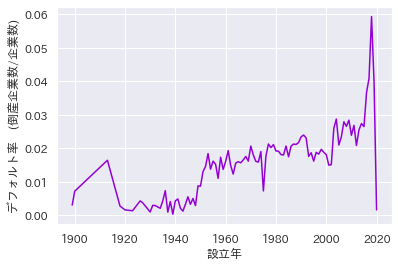

In [243]:
fig = plt.figure()

ax = fig.add_subplot(111)
dfc_tmp.rate.plot(color=['darkviolet'])#.bar()
ax.set_xlabel('設立年')
ax.set_ylabel('デフォルト率　(倒産企業数/企業数)')
plt.show()

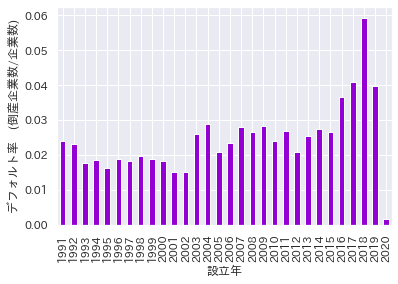

In [245]:
fig = plt.figure()

ax = fig.add_subplot(111)
dfc_tmp.iloc[-30:,:].rate.plot.bar(color=['darkviolet'])
ax.set_xlabel('設立年')
ax.set_ylabel('デフォルト率　(倒産企業数/企業数)')
plt.show()

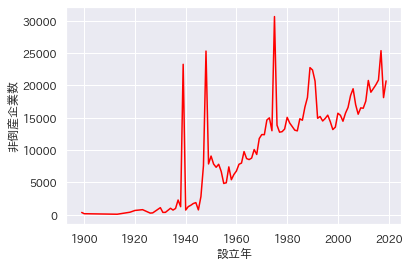

In [242]:
fig = plt.figure()

ax = fig.add_subplot(111)

dfc_tmp.iloc[:-1,:].alive.plot(color=['red'])
ax.set_xlabel('設立年')
ax.set_ylabel('非倒産企業数')
plt.show()

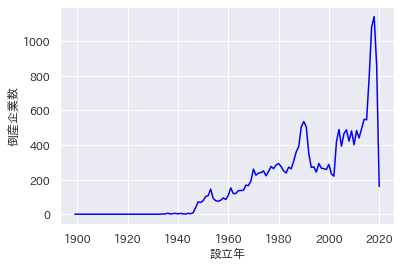

In [241]:
fig = plt.figure()

ax = fig.add_subplot(111)

dfc_tmp.default.plot(color=['blue'])
ax.set_xlabel('設立年')
ax.set_ylabel('倒産企業数')
plt.show()

# 調査日と成立年の差分

In [184]:

funca= lambda x: str(x//100)[:4]+"-"+str(x//100)[4:]

func1 = lambda x: int(x+1) if str(int(x))[-1]=="0" else int(x)
func2 = lambda x: 100*x+1 if x<10000 else x
funcb= lambda x: str(x)[:4]+"-"+str(x)[4:]

df_inv_date = pd.to_datetime(dfcc[inv_date].apply(funca))

df_time = pd.to_datetime(dfcc[time].apply(func1).apply(func2).apply(funcb))


In [204]:
[i for i in dfcc[inv_date] if len(str(i))!=8]

[]

In [202]:
#pd.to_datetime(dfcc[time].iloc[2183390:2183399].apply(func).apply(funcb)).head()
#dfcc[time].head(1850)#.apply(func).apply(funcb)
func1 = lambda x: int(x+1) if str(int(x))[-1]=="0" else int(x)
dfcc[inv_date].head()

0    20191222
1    20200615
2    20200227
3    20170213
4    20200408
Name: 調査日, dtype: int64

In [188]:
dfcc["alive_time"] = 12*(df_inv_date.dt.year-df_time.dt.year) +(df_inv_date.dt.month - df_time.dt.month)

In [189]:
dfcc.head()

,設立年_月,会社状況名称,調査日,sa,alive_time
0,197307.0,非倒産,20191222,557,557
1,194311.0,非倒産,20200615,919,919
2,195103.0,非倒産,20200227,827,827
3,197302.0,解散,20170213,528,528
4,196809.0,非倒産,20200408,619,619


In [190]:
df_default_m = dfcc[dfcc[default].isin(["倒産","小口倒産","解散"])]
df_alive_m = dfcc[dfcc[default].isin(["非倒産"])]

In [253]:
df_default_m.shape

(194369, 5)

In [192]:
df_alive_m.shape

(4835720, 5)

In [194]:
tmp = df_alive_m["alive_time"]
print(tmp.median())
tmp.describe()

312.0


count    4.835720e+06
mean     3.518419e+02
std      2.949581e+02
min     -1.160000e+02
25%      8.800000e+01
50%      3.120000e+02
75%      5.530000e+02
max      1.827000e+03
Name: alive_time, dtype: float64

In [195]:
tmp = df_default_m["alive_time"]
print(tmp.median())
tmp.describe()

306.0


count    194369.000000
mean        322.941981
std         228.649508
min        -153.000000
25%         117.000000
50%         306.000000
75%         489.000000
max        1654.000000
Name: alive_time, dtype: float64

In [228]:
dfc_tmp_m = pd.DataFrame(df_default_m["alive_time"].value_counts())#.rename(columns={time_range:"default"}))

dfc_tmp_m = dfc_tmp_m.sort_index(ascending=True)
#dfc_tmp.loc[:,"total"] = dfc_tmp.default+dfc_tmp.alive
#dfc_tmp.loc[:,"rate"] = dfc_tmp.default/dfc_tmp.total
#dfc_tmp = dfc_tmp.rename(index=dfc_tmp["index"])
#dfc_tmp = dfc_tmp.iloc[1:,:]
dfc_tmp_m = dfc_tmp_m.iloc[7:,:]
dfc_tmp_m

,alive_time
0,42
1,76
2,137
3,214
4,312
5,293
6,295
7,333
8,351
9,392


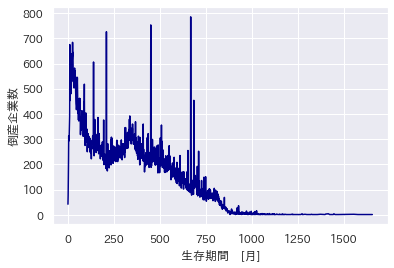

In [240]:
fig = plt.figure()

ax = fig.add_subplot(111)
dfc_tmp_m.alive_time.plot(color=["darkblue"])
ax.set_xlabel('生存期間　[月]')
ax.set_ylabel('倒産企業数')
plt.show()

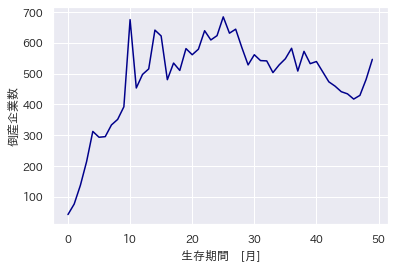

In [252]:
fig = plt.figure()

ax = fig.add_subplot(111)
dfc_tmp_m.iloc[:50,:].alive_time.plot(color=["darkblue"])
ax.set_xlabel('生存期間　[月]')
ax.set_ylabel('倒産企業数')
plt.show()

# 調査日ってどうなってる？

In [49]:
df_alive_ = dfc[dfc[default].isin(["非倒産"])]

In [50]:
func= lambda x: x//10000
df_alive_inv = df_alive_[inv_date].apply(func)

In [ ]:
df_alive_inv = df_alive_inv

In [62]:
df_a = df_alive_inv.value_counts().sort_index(ascending=True)

In [238]:
df_a.head()

1999        2
2000       12
2002      211
2003      229
2004    65865
Name: 調査日, dtype: int64

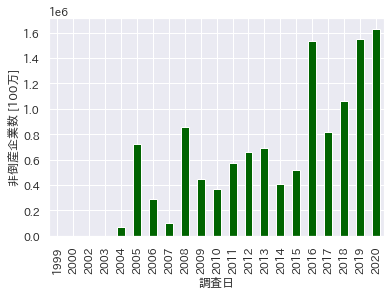

In [237]:
fig = plt.figure()

ax = fig.add_subplot(111)
df_a.plot.bar(color=["darkgreen"])
ax.set_xlabel('調査日')
ax.set_ylabel('非倒産企業数 [100万]')
plt.show()

In [60]:
df_a

2020    1631841
2019    1549002
2016    1532055
2018    1059666
2008     859445
2017     814948
2005     720811
2013     692023
2012     660816
2011     571076
2015     517730
2009     444820
2014     406224
2010     366784
2006     286201
2007      97562
2004      65865
2003        229
2002        211
2000         12
1999          2
Name: 調査日, dtype: int64

# LBC

In [74]:
lbc = dfc["LBC"].value_counts()

In [76]:
lbc.head()

10079505451    1
10204831097    1
10095955858    1
10176673034    1
10139426554    1
Name: LBC, dtype: int64

# sales range

In [72]:
sales_range = dfc["売上高詳細レンジ"].value_counts()

In [73]:
df_default = dfc[dfc[default].isin(["倒産","小口倒産","解散"])]
df_alive = dfc[dfc[default].isin(["非倒産"])]

99    11387084
3       879871
1       789524
2       435621
9       318237
12      302109
4       285389
5       248972
8       220593
7       166038
11      155990
6       138627
14      133386
10      128615
13       70033
Name: 売上高詳細レンジ, dtype: int64

In [250]:
dfc.shape

(15660089, 127)

# 従業員数

In [246]:
n_emp_range = dfc["従業員数詳細レンジ"].value_counts()

In [248]:
n_emp_range

99    11238309
1      1138809
2       492851
7       473921
6       312113
3       306824
11      263069
9       260352
5       255625
4       230401
10      210048
8       209856
13      138567
12      129344
Name: 従業員数詳細レンジ, dtype: int64

In [249]:
dfc.shape

(15660089, 127)

# 評価指標　ARの実装

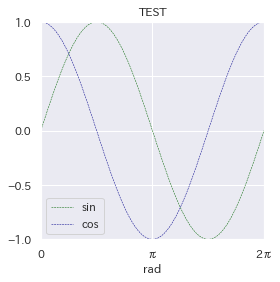

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

N=100
rad = np.linspace(0,2*np.pi,N)
df = pd.DataFrame({'rad': rad, 'sin': np.sin(rad), 'cos': np.cos(rad)})

# SeabornのデフォルトStyleを使用
sns.set(font="IPAexGothic")
# グラフのサイズを設定
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
# DataFrameのPlotを使用する
df.plot(x='rad', y=['sin','cos'], ax=ax,
        linestyle='dashed', #線種
        color=['darkgreen', 'darkblue'], #色
        linewidth = 0.5 #線の幅
)
# TITLEを設定
ax.set_title("TEST")
# X軸の範囲
ax.set_xlim(0,2*np.pi)
# Y軸の範囲
ax.set_ylim(-1,1)
# X軸のTick（目盛）の位置を設定
ax.set_xticks([0, np.pi, np.pi*2])
# X軸のTick（目盛）の表記を設定
ax.set_xticklabels([0, 'π', '2π'])
# Y軸のTick（目盛）の位置を設定
ax.set_yticks([-1, -0.5, 0, 0.5, 1])
# X軸のラベルを設定
ax.set_label('X [RAD]')
# グラフ表示
plt.show()


In [246]:
import random
random.seed(0)
y_values=[0]*900000
y_values+=[1]*5000
random.shuffle(y_values)
y_preds_proba=[0]*905000

    0  1
0   0  0
1   0  0
2   0  0
3   0  0
4   0  0
5   0  0
6   0  0
7   0  0
8   0  0
9   0  0
10  0  0
11  0  0
12  0  0
13  0  0
14  0  0
15  0  0
16  1  0
17  0  0
18  0  0
19  0  0


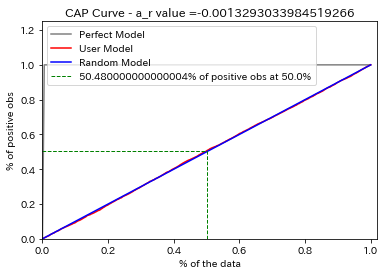

In [249]:
capcurve(np.array(y_values), np.array(y_preds_proba))

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
from sklearn.metrics import roc_curve

def capcurve(y_values, y_preds_proba):
    num_pos_obs = np.sum(y_values)
    num_count = len(y_values)
    rate_pos_obs = float(num_pos_obs) / float(num_count)
    ideal = pd.DataFrame({'x':[0,rate_pos_obs,1],'y':[0,1,1]})
    xx = np.arange(num_count) / float(num_count - 1)
    
    y_cap = np.c_[y_values,y_preds_proba]
    y_cap_df_s = pd.DataFrame(data=y_cap)
    y_cap_df_s = y_cap_df_s.sort_values([1], ascending=False).reset_index(level = y_cap_df_s.index.names, drop=True)
    
    print(y_cap_df_s.head(20))
    
    yy = np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
    yy = np.append([0], yy[0:num_count-1]) #add the first curve point (0,0) : for xx=0 we have yy=0
    
    percent = 0.5
    row_index = int(np.trunc(num_count * percent))
    
    val_y1 = yy[row_index]
    val_y2 = yy[row_index+1]
    if val_y1 == val_y2:
        val = val_y1*1.0
    else:
        val_x1 = xx[row_index]
        val_x2 = xx[row_index+1]
        val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
    
    sigma_ideal = 1 * xx[num_pos_obs - 1 ] / 2 + (xx[num_count - 1] - xx[num_pos_obs]) * 1
    sigma_model = integrate.simps(yy,xx)
    sigma_random = integrate.simps(xx,xx)
    
    ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.plot(ideal['x'],ideal['y'], color='grey', label='Perfect Model')
    ax.plot(xx,yy, color='red', label='User Model')
    ax.plot(xx,xx, color='blue', label='Random Model')
    ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=1)
    ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=1, label=str(val*100)+'% of positive obs at '+str(percent*100)+'%')
    
    plt.xlim(0, 1.02)
    plt.ylim(0, 1.25)
    plt.title("CAP Curve - a_r value ="+str(ar_value))
    plt.xlabel('% of the data')
    plt.ylabel('% of positive obs')
    plt.legend()
    plt.show()
    #plt.savefig('C:\\Users\\apavlides\\Documents\\OddsEnds\\cap_graph.pdf')

In [240]:
y_values=[1,1,0,1,0]
#y_values = [[1,0],[1,0],[0,1]]
y_preds_probas = np.array([[0.8,0.2],[0.7,0.3],[0.2,0.8],[0.1,0.9],[0.15,0.85]])
y_preds_proba = y_preds_probas[:,1]
#y_preds_proba=[1,1,1,1,1]

In [219]:
y_preds_proba

[1, 1, 1, 1, 1]

   0  1
0  1  1
1  1  1
2  0  1
3  1  1
4  0  1
0.5
0.5
0.5277777777777777
inf


<ipython-input-144-2b34e35bbb44>:38: RuntimeWarning: divide by zero encountered in double_scalars
  ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)


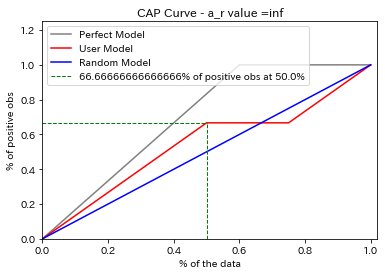

In [220]:
capcurve(y_values, y_preds_proba)

   0  1
0  1  1
1  1  1
2  1  1
3  0  0
4  0  0
0.5
0.5


<ipython-input-195-5b412b8a0baa>:32: RuntimeWarning: divide by zero encountered in double_scalars
  ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)


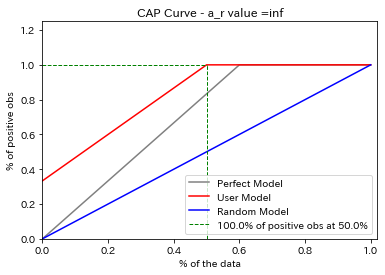

In [195]:
    num_pos_obs = np.sum(y_values)
    num_count = len(y_values)
    rate_pos_obs = float(num_pos_obs) / float(num_count)
    ideal = pd.DataFrame({'x':[0,rate_pos_obs,1],'y':[0,1,1]})
    xx = np.arange(num_count) / float(num_count - 1)
    
    y_cap = np.c_[y_values,y_preds_proba]
    y_cap_df_s = pd.DataFrame(data=y_cap)
    y_cap_df_s = y_cap_df_s.sort_values([1], ascending=False).reset_index(level = y_cap_df_s.index.names, drop=True)
    
    print(y_cap_df_s.head(20))
    
    yy = np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
 #   yy = np.append([0], yy[0:num_count-1]) #add the first curve point (0,0) : for xx=0 we have yy=0
    
    percent = 0.5
    row_index = int(np.trunc(num_count * percent))
    
    val_y1 = yy[row_index]
    val_y2 = yy[row_index+1]
    if val_y1 == val_y2:
        val = val_y1*1.0
    else:
        val_x1 = xx[row_index]
        val_x2 = xx[row_index+1]
        val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
    
    sigma_ideal = 1 * xx[num_pos_obs - 1 ] / 2 + (xx[num_count - 1] - xx[num_pos_obs]) * 1
    sigma_model = integrate.simps(yy,xx)
    sigma_random = integrate.simps(xx,xx)
    
    ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)
    print(sigma_random)
    print(sigma_ideal)
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.plot(ideal['x'],ideal['y'], color='grey', label='Perfect Model')
    ax.plot(xx,yy, color='red', label='User Model')
    ax.plot(xx,xx, color='blue', label='Random Model')
    ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=1)
    ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=1, label=str(val*100)+'% of positive obs at '+str(percent*100)+'%')
    
    plt.xlim(0, 1.02)
    plt.ylim(0, 1.25)
    plt.title("CAP Curve - a_r value ="+str(ar_value))
    plt.xlabel('% of the data')
    plt.ylabel('% of positive obs')
    plt.legend()
    plt.show()

In [197]:
xx

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [196]:
yy

0    0.333333
1    0.666667
2    1.000000
3    1.000000
4    1.000000
Name: 0, dtype: float64

In [198]:
ideal

,x,y
0,0.0,0
1,0.6,1
2,1.0,1


In [189]:
np.arange(num_count)# / float(num_count - 1)

array([0, 1, 2, 3, 4, 5])

In [190]:
y_cap_df_s

,0,1
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
5,0,0


In [193]:
a=np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
a
y_cap_df_s[0]

0    1
1    1
2    1
3    1
4    0
5    0
Name: 0, dtype: int64

In [182]:
np.append([0], a[0:num_count-1])

array([0.        , 0.33333333, 0.66666667, 1.        , 1.        ])